In [1]:
import pandas as pd
import json
import requests

#https://api.meteostat.net/v1/stations/search?q=los+angeles&key=APyHpAtV search for stations

#data":[{"id":"72386","country":"US","name":"Las Vegas McCarran International"} https://meteostat.net/en/station/72386
#data":[{"id":"72314","country":"US","name":"Charlotte Charlotte/Douglas International"}]} https://meteostat.net/en/station/72314
#"data":[{"id":"71508","country":"US","name":"Toronto City"}]} https://meteostat.net/en/station/71508
cities = {'Las Vegas': "72386", 'Charlotte': "72314", 'Toronto': "71508"}
weather_key = "APyHpAtV"

In [2]:
#weather Info
base_url = f"https://api.meteostat.net/v1/history/monthly?start=2019-01&end=2019-12&key={weather_key}"
weather_df = pd.DataFrame([{'City': "", 
                            'Month': "", 
                            'Average Temperature (C)': "", 
                            'Average Temperature (F)': "", 
                            'Raindays': "", 
                            'Precipitation (mm)': ""}])    
for city in cities:
    city_url = f"{base_url}&station={cities[city]}"
    city_data = requests.get(city_url).json()
    city_df = pd.DataFrame({'City': city,
                      'Month': [month['month'] for month in city_data['data']],
                     'Average Temperature (C)': [month['temperature_mean'] for month in city_data['data']],
                    'Average Temperature (F)' : [((month['temperature_mean']*(9/5)) + 32)for month in city_data['data']],
                     'Raindays': [month['raindays'] for month in city_data['data']],
                     'Precipitation (mm)': [month['precipitation'] for month in city_data['data']]})
    weather_df = pd.concat([weather_df, city_df])
weather_df = weather_df.iloc[1:]
weather_df.to_csv("WeatherData/WeatherData.csv")

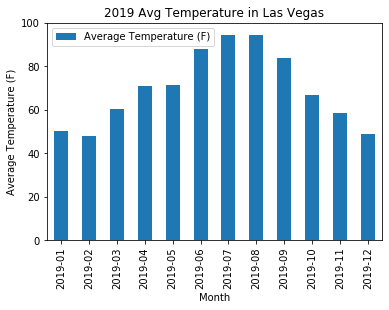

In [7]:
lv_df = weather_df.loc[weather_df['City'] == 'Las Vegas']
ax = lv_df.plot.bar('Month', 'Average Temperature (F)')
ax.set_ylim(0,100)
ax.set_ylabel("Average Temperature (F)")
ax.set_title("2019 Avg Temperature in Las Vegas")
lv_df.to_csv("WeatherData/LVMonthly2019.csv")
ax

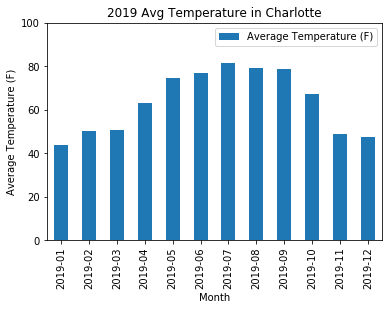

In [6]:
ch_df = weather_df.loc[weather_df['City'] == 'Charlotte']
ax = ch_df.plot.bar('Month', 'Average Temperature (F)')
ax.set_ylim(0,100)
ax.set_ylabel("Average Temperature (F)")
ax.set_title("2019 Avg Temperature in Charlotte")
ch_df.to_csv("WeatherData/CHMonthly2019.csv")
ax

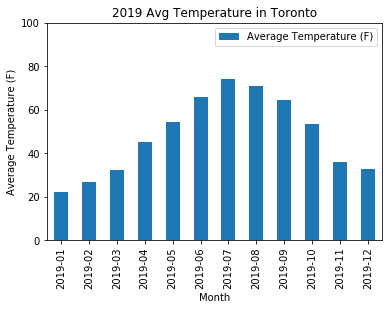

In [5]:
tn_df = weather_df.loc[weather_df['City'] == 'Toronto']
ax = tn_df.plot.bar('Month', 'Average Temperature (F)')
ax.set_ylim(0,100)
ax.set_ylabel("Average Temperature (F)")
ax.set_title("2019 Avg Temperature in Toronto")
tn_df.to_csv("WeatherData/TNMonthly2019.csv")
ax

In [8]:
weather_df

,City,Month,Average Temperature (C),Average Temperature (F),Raindays,Precipitation (mm)
0,Las Vegas,2019-01,10.2,50.36,4,26
1,Las Vegas,2019-02,8.7,47.66,6,52
2,Las Vegas,2019-03,15.6,60.08,2,9
3,Las Vegas,2019-04,21.7,71.06,2,9
4,Las Vegas,2019-05,21.8,71.24,3,20
5,Las Vegas,2019-06,31,87.8,0,0
6,Las Vegas,2019-07,34.5,94.1,0,1
7,Las Vegas,2019-08,34.6,94.28,0,0
8,Las Vegas,2019-09,28.7,83.66,1,6
9,Las Vegas,2019-10,19.2,66.56,0,0
